In [1]:
from preprocess import csv_to_ylabel
from sklearn.model_selection import train_test_split
import glob
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
show = partial(plt.imshow, cmap="gray")

In [3]:
suls = glob.glob("./data/**/*설형우_image*", recursive=True)
suls2 = glob.glob("./data/**/*shw__Image*", recursive=True)
gos = glob.glob("./data/**/*고태환_image*", recursive=True)
img_paths = suls + suls2 + gos

In [4]:
# 정사각형 추출 -> 300, 300 resizing 하는 함수
def preprocess_img(img_path):
    img = cv2.imread(img_path, 0)
    _, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
    ys = np.where(thresh == 0)[0]
    xs = np.where(thresh == 0)[1]
    xmin, xmax = np.min(xs)+5, np.max(xs)-5
    ymin, ymax = np.min(ys)+5, np.max(ys)-5
    square_img = img[ymin:ymax, xmin:xmax]
    square_img = cv2.resize(square_img, (280, 280), cv2.INTER_AREA)
    return square_img

In [5]:
# 경로상 이미지 -> 컷팅 후 저장
for img_path in img_paths:
    square_img = preprocess_img(img_path)
    filename = img_path.split('/')[-1]
    filename = filename.split('.')[-2] + ".jpg"
    # 밑의 2개는 특수 처리
    filename = filename.lower()
    filename = filename.replace("__", "_")
    cv2.imwrite(os.path.join("after", filename), square_img)

    
## 여기까지 이미지 컷팅

In [7]:
suls = glob.glob("./data/**/*설형우_*.csv", recursive=True)
suls2 = glob.glob("./data/**/*shw_*.csv", recursive=True)
gos = glob.glob("./data/**/*고태환_*.csv", recursive=True)
labels = suls + suls2 + gos
labels = [label for label in labels if not label.split(".csv")[-2].endswith("spf")]

base_names = []
for label in labels:
    splited = label.split("_")
    base_name = '_'.join(splited[:-1])
    base_names.append(base_name)
base_names = set(base_names)
base_names = list(base_names)
base_names.sort(key=lambda x:int(x.split('/')[-2]))

In [8]:
x_data = []
y_data = []
img_dir = "after/"
for base_name in set(base_names):
    only_basename = base_name.split('/')[-1]
    img_name = only_basename + "_image.jpg"
    try:
        x_label = cv2.imread(os.path.join(img_dir, img_name), 0)
        p_label = csv_to_ylabel(base_name + "_P.csv", 280)
        u_label = csv_to_ylabel(base_name + "_u.csv", 280)
        v_label = csv_to_ylabel(base_name + "_v.csv", 280)
        y_label = np.stack([p_label, u_label, v_label], axis=-1)
        x_data.append(x_label)
        y_data.append(y_label)
    except Exception as e:
        print(e)
        print(base_name)

In [9]:
x = x_data.copy()
y = y_data.copy()

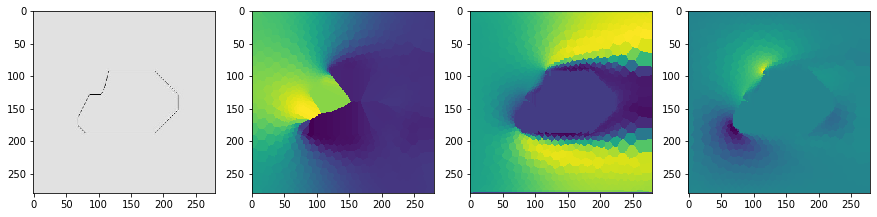

In [21]:
plt.figure(figsize=(15, 15))
test_img = x.pop(0)
predicted_img = y.pop(0)

plt.subplot(1, 4, 1)
plt.imshow(test_img, cmap="gray")
plt.subplot(1, 4, 2)
plt.imshow(predicted_img[:, :, 0])
plt.subplot(1, 4, 3)
plt.imshow(predicted_img[:, :, 1])
plt.subplot(1, 4, 4)
plt.imshow(predicted_img[:, :, 2])